In [163]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import pickle
import base64
from collections import defaultdict
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size':20})

### Read data

In [150]:
BASE_DIR = "./data/run7/"
data = pd.read_csv(BASE_DIR + "1_infer_stats.csv", header=None, names=["timestamp", "latency", "accuracy", "samples", "datadict"])
gpu_data = pd.read_csv(BASE_DIR + "node_gpu_0.csv", header=None, names=["timestamp", "id", "load", "memoryTotal", "memoryUsed"])

In [151]:
start_timestamp = min(data["timestamp"])
infer_latency_data = data["latency"]/data["samples"]
infer_timestamps = data["timestamp"] - start_timestamp
infer_accuracy_data = data["accuracy"]

In [152]:
gpu_timestamps = gpu_data["timestamp"] - start_timestamp
gpu_load = gpu_data["load"]

In [153]:
# Wrangling for getting classwise accuracy
data_b64 = data.tail(1)["datadict"].values[0]
all_keys = list(pickle.loads(base64.b64decode(data_b64)).keys())
infer_accuracy_per_class = defaultdict(list)
for index, row in data.iterrows():
    acc_dict = pickle.loads(base64.b64decode(row["datadict"]))
    for key in all_keys:
        val_to_append = acc_dict[key] if key in acc_dict else 0
        infer_accuracy_per_class[key].append(val_to_append)

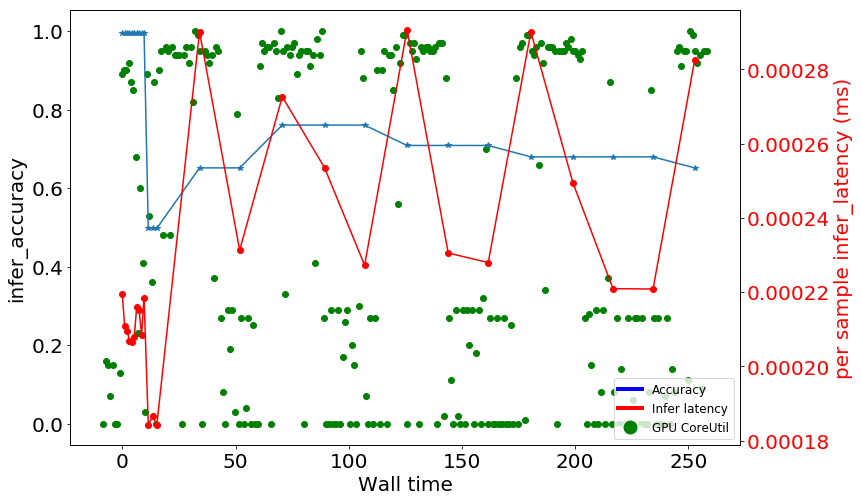

In [170]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(infer_timestamps, infer_accuracy_data, marker='*')
ax1.scatter(gpu_timestamps, gpu_load, color='g')
# for c, c_data in infer_accuracy_per_class.items():
#     ax1.plot(infer_timestamps, c_data, marker='*')
ax1.set_ylabel('infer_accuracy')

ax2 = ax1.twinx()
ax2.plot(infer_timestamps, infer_latency_data, 'r-', marker='o')
ax2.set_ylabel('per sample infer_latency (ms)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

ax1.set_xlabel("Wall time")

legend_elements = [Line2D([0], [0], color='b', lw=4, label='Accuracy'),
                   Line2D([0], [0], color='r', lw=4, label='Infer latency'),
                   Line2D([0], [0], marker='o', color='w', label='GPU CoreUtil',
                          markerfacecolor='g', markersize=15)]

# Create the figure
ax1.legend(handles=legend_elements, loc='lower right', prop={'size': 12})